# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel mini-projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to https://www.facebook.com/UpLevelSG/ and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

1. Download public housing resale data in Singapore (Part I)
2. Perform data cleaning (Part II)
3. Perform exploratory data analysis (Part III)
4. Engineer new features (Part IV)
5. Apply machine learning techniques to train a model to predict housing resale prices (Part V)

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

# Introduction

In this notebook, you will do the following:
1. Import your pandas library
2. Download the HDB resale prices 
3. Calculate features to update old CSVs
4. Combine HDB prices from all years
5. Export your DataFrame as a CSV file 

### Step 1: Import the following library
- pandas

In [1]:
# Step 1: Import your library
import pandas as pd

### Step 2: Head on to Data.gov.sg website to download your data
1. Go to https://data.gov.sg/dataset/resale-flat-prices
2. Examine the table there
3. Click the orange download button on the upper right hand corner
4. Download the zip file and store it in the same folder as your Jupyter notebooks
5. Unzip your files - doesn't matter if you put them in a separate folder or if you unzip all of them in the same folder with this notebook

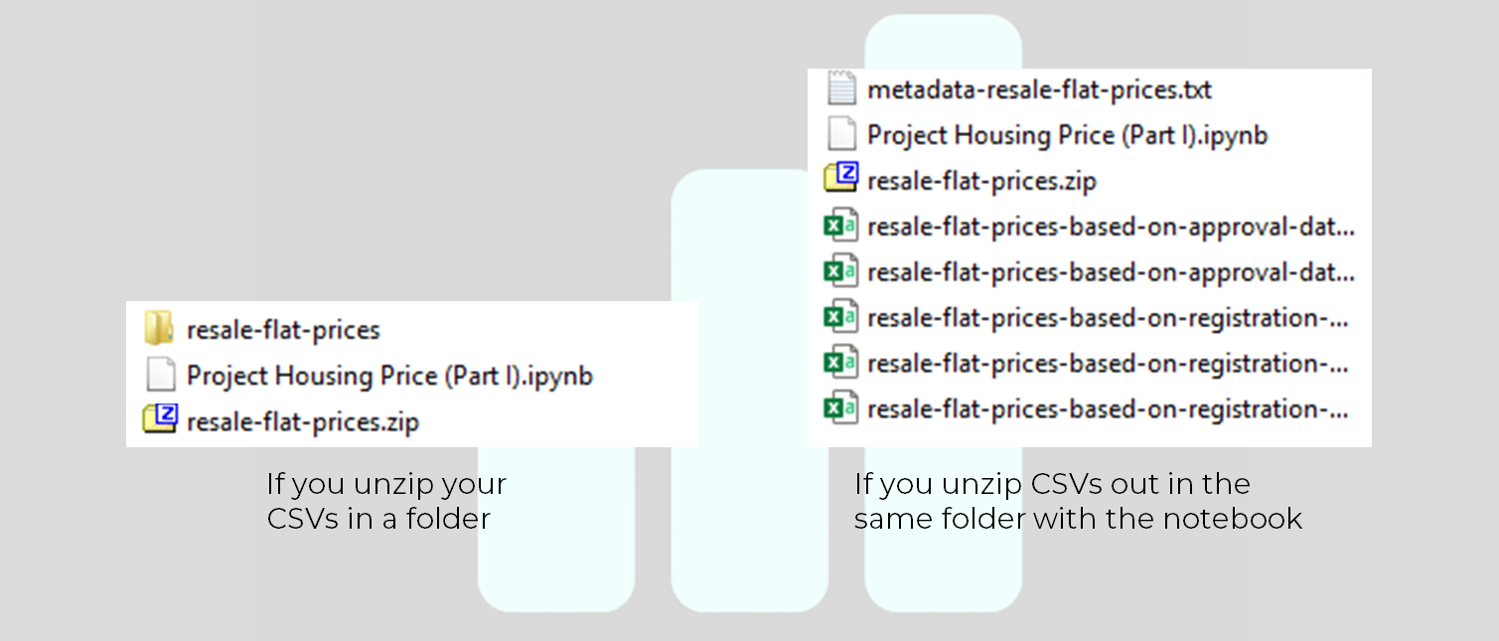


### Step 3: Load your CSVs into DataFrames
After you download and unzip the files within, you will now have to load each of the CSVs found within.

At the time of writing this, there are five CSVs contained within:
1. 1990 - 1999
2. 2000 - Feb 2012
3. Mar 2012 - Dec 2014
4. Jan 2015 - Dec 2016
5. Jan 2017 - current year

We don't really know why it's like this. It probably has to with how the records were kept over time. That said, having a central place to download all of the CSVs is good enough already, believe it or not. 

Declare as many variables as you need and assigned each with a DataFrame containing the CSV file.

If you see more than five, then no problem just declare more variables.

In [4]:
# Step 3: load your CSVs
df1 = pd.read_csv(r'C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv(r"C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df3 = pd.read_csv(r"C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
df4 = pd.read_csv(r"C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df5 = pd.read_csv(r"C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [62]:
df4 = pd.read_csv(r"C:\Users\tianweizheng\OneDrive - Crimsonlogic Pte Ltd\OneDrive_Documents\Tianwei Documents\Education\Python Scripts\UpLevelPythonForRealEstate_20220323\resale_dataset\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")

### Step 4: Inspect each DataFrame
The journey of a thousand miles starts with a single step, but in your case since we have a few DataFrames - let's inspect all of them. 

Since we are going to combined these different DataFrames into one soon, We want to look out for a few things first:
1. Number of columns<br>
We want to check if the number of columns tally with each other
2. Column names <br>
We want to check if the column names are exactly the same
3. Data type in each column <br>
We also want to check if the columns contain the same kind of data across the different DataFrames

In [24]:
# Step 4: Look at your DataFrames' first five rows
df_list1 = list([df1,df2,df3,df4,df5])

for df in df_list1:
    print('Shape of df is {0}'.format(df_list1.index(df)+1,df.shape))
    

Shape of df is (287200, 10)
Shape of df is (369651, 10)
Shape of df is (52203, 10)
Shape of df is (37153, 11)
Shape of df is (82801, 11)


In [29]:
df1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000


In [30]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [31]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [33]:
df4.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [34]:
df5.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


### Step 5: Calculate remaining_lease for DataFrames from older CSVs
If you looked at the DataFrames from earlier times, you might have noticed that the earlier CSVs did not have the feature "remaining_lease" on it. 

There are two ways (and one wrong way) to treat our data so we can harmonize the data and have a clean combined DataFrame:
1. drop "remaining_lease" from the latest DataFrames
2. create "remaining_lease" for the older DataFrames
3. just ignore everything and combine it

It's easy to do 1, but it's more appropriate to do 2. And we definitely shouldn't do 3. 

We achieve 2 by doing a bit of research and using domain knowledge to calculatte remaining_lease. The remaining lease of the property is important. In the Singaporean context, all public housing in HDB has a 99-year lease and after that the building would be returned to the government. 

Read more: http://webcache.googleusercontent.com/search?q=cache:3zkxNLAVpH0J:https://www.channelnewsasia.com/news/singapore/ndr-2018-hdb-lease-99-years-flat-national-day-rally-10631442&hl=en&gl=sg&strip=1&vwsrc=0

There are no exceptions for the 99-year lease so we can calculate remaining_lease for by using the following formula:

\begin{equation*}
remaining\_lease = 99 - (year - lease\_commence\_date)
\end{equation*}

Here are the steps needed:
1. Create two columns named "year" and "real_month" using "month" column for all DataFrames 

2. Create a new column named remaining_lease for DataFrames without it

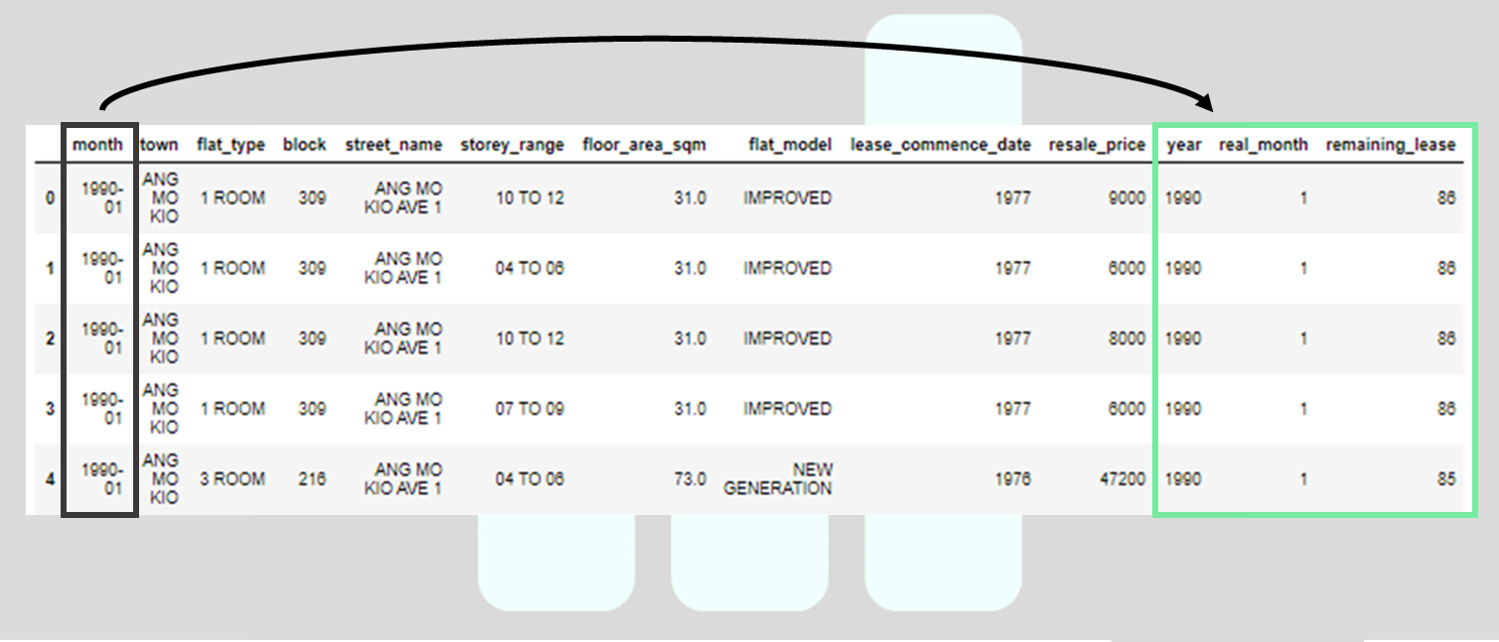

For the first CSV from 1990 to 1999, this is what you're supposed to see after you create a new column named "year" and "remaining_lease".

<strong>Hint: Google for "split string column into two columns pandas" to get "year" and "real_month"</strong>

<strong>Hint 2: There are more than 2 ways of getting your "year" and "real_month"; as long as you get them it's all good</strong>

<strong>Hint 3: Don't forget you've split/sliced a string for "year" and "real_month" - you'll need it as type <em>int</em> to calculate remaining_lease. Consider googling "turn column into int pandas" if you're stuck</strong>

In [47]:
df1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
year                    object
real_month              object
dtype: object

In [51]:
# Step 5a: Create a "year" and "real_month" column for ALL of your DataFrames using the information from "month". 
# Hint 1 will be useful
df1[['year','real_month']] = df1['month'].str.split('-',1,expand=True)
df1['year'] = pd.to_numeric(df1['year'])

In [55]:
df1['remaining_lease'] = 99-(df1['year']-df1['lease_commence_date'])

In [56]:
df1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,1990,01,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,1990,01,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,1990,01,86


In [57]:
df2[['year','real_month']] = df2['month'].str.split('-',1,expand=True)
df2['year'] = pd.to_numeric(df2['year'])
df2['remaining_lease'] = 99-(df2['year'] - df2['lease_commence_date'])
df2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,2000,01,85
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,2000,01,85


In [59]:
df3[['year','real_month']] = df3['month'].str.split('-',1,expand=True)
df3['year'] = pd.to_numeric(df3['year'])
df3['remaining_lease'] = 99-(df3['year']-df3['lease_commence_date'])
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,03,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,03,67


In [63]:
df4[['year','real_month']] = df4['month'].str.split('-',expand=True)
df4['year'] = pd.to_numeric(df4['year'])
df4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,real_month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,01
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,01


In [65]:
# Step 5c: For DataFrames without 'remaining_lease', create them. Make sure your lease_commence_date is not in string format
df5[['year','real_month']] = df5['month'].str.split('-',expand=True)
df5['year'] = pd.to_numeric(df5['year'])
df5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,real_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,01
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,01


### Step 6: Combine all of your DataFrames together
Well done! It was repetitive, but you did what you needed to do. With this, you made sure that the old DataFrames had the same columns as the new ones. 

Next up, time to combine all of the DataFrames into one before you export them as a combined CSV. 

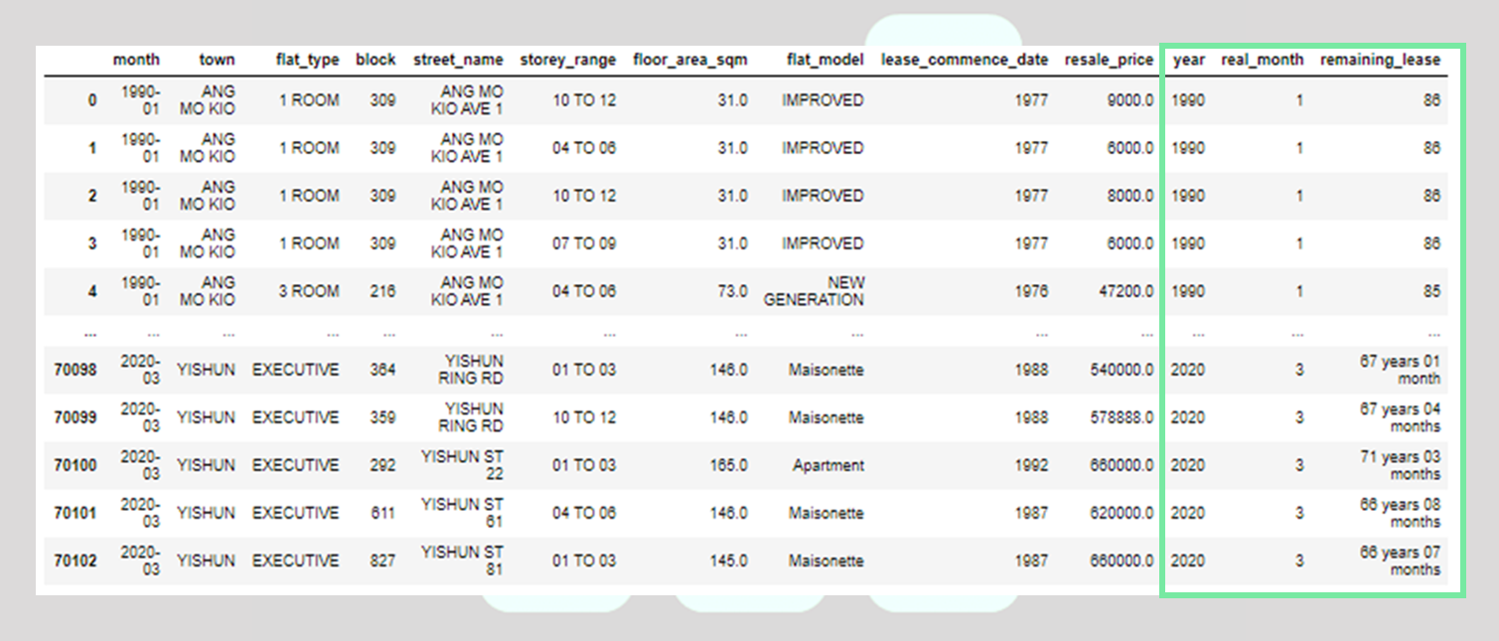

If you combine all of the DataFrames correctly, you'll have more than 800,000 rows and 13 columns. The data is always updated so we don't have the exact numbers. But having 800k rows and above is a good start. 

In [67]:
# Check dataframe shapes again after engineering
df_list = [df1,df2,df3,df4,df5]
x = 0
for df in df_list:
    x += 1
    print('Shape of df{0} is {1}'.format(x,df.shape))
    

Shape of df1 is (287200, 13)
Shape of df2 is (369651, 13)
Shape of df3 is (52203, 13)
Shape of df4 is (37153, 13)
Shape of df5 is (82801, 13)


In [70]:
# Step 6: Concatenate all of your dataframes into one
concat_df = pd.concat([df1,df2,df3,df4,df5], axis=0, sort=False)
concat_df.shape

(829008, 13)

In [74]:
concat_df.sample(20)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
222320,2006-11,WOODLANDS,3 ROOM,213,MARSILING CRES,01 TO 03,74.0,Model A,1982,138000.0,2006,11,75
182689,1998-02,HOUGANG,4 ROOM,556,HOUGANG ST 51,04 TO 06,103.0,MODEL A,1992,293000.0,1998,02,93
190936,1998-04,PASIR RIS,EXECUTIVE,509,PASIR RIS ST 52,04 TO 06,146.0,APARTMENT,1993,530000.0,1998,04,94
3884,2015-04,BEDOK,3 ROOM,23,BEDOK STH AVE 1,07 TO 09,73.0,New Generation,1977,350000.0,2015,04,61
44589,2019-02,SERANGOON,3 ROOM,124,SERANGOON NTH AVE 1,01 TO 03,67.0,New Generation,1985,270000.0,2019,02,64 years 11 months
81039,1994-11,GEYLANG,3 ROOM,65,CIRCUIT RD,10 TO 12,59.0,STANDARD,1967,64000.0,1994,11,72
180099,2005-06,ANG MO KIO,4 ROOM,354,ANG MO KIO ST 32,13 TO 15,90.0,Model A,2001,260000.0,2005,06,95
33006,2018-08,BUKIT BATOK,3 ROOM,208,BT BATOK ST 21,07 TO 09,73.0,Model A,1983,285000.0,2018,08,64 years 01 month
20429,2013-01,CHOA CHU KANG,5 ROOM,474,CHOA CHU KANG AVE 3,04 TO 06,120.0,Improved,1999,485000.0,2013,01,85
192691,1998-05,BEDOK,4 ROOM,116,LENGKONG TIGA,04 TO 06,104.0,MODEL A,1989,380000.0,1998,05,90


### Step 7: Export DataFrame to CSV
Last step for Part I! You'll export this DataFrame as a CSV so that you can use it in Part II: Data Cleaning. If you're sharp, you might have noticed that our data is kinda dirty. For example, "remaining_lease" contains not just integers but strings as well. This will complicate things later on. 

But don't worry, we'll export first and clean later.

In [76]:
# Step 7: Export your DataFrame to a CSV
concat_df.to_csv('part1_result.csv', index=False) #Set index as false to prevent 'Unnamed' col 